<a href="https://colab.research.google.com/github/dansojo/Medical_CV/blob/main/MRI_Noise_Removal_NLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목표: MRI 이미지에 NLM 필터를 적용하여 MRI 특유의 복잡한 노이즈를 제거하고, 조직의 미세한 디테일을 보존한다.**

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [2]:
# MRI 이미지 로드

image_path = '/content/drive/MyDrive/Medical_CV/MRI/MRI 이미지/MRI_T1.jpeg'
mri_image = io.imread(image_path, as_gray=True)

In [3]:
#  원본 이미지 데이터 확인
print(f"Original mri_image - Min Value: {mri_image.min()}, Max Value: {mri_image.max()}")
print(f"Original mri_image - Data Type: {mri_image.dtype}")
print(f"Original mri_image - Shape: {mri_image.shape}")

Original mri_image - Min Value: 0, Max Value: 255
Original mri_image - Data Type: uint8
Original mri_image - Shape: (630, 630)


In [4]:
# 해당 이미지의 경우 이미 unit8 타입에 0~ 255 값을 갖고 있기 때문에
# 해당 코드는 적용할 필요 X
# mri_image_uint8 = (mri_image * 255).astype('uint8')

In [5]:
# Non-Local Means (NLM) 필터는 이미지의 복잡한 노이즈를 제거하면서도, 원본 이미지의
# 세부적인 구조와 텍스처를 보존하는 고급 노이즈 제거 기법
# 해당 필터는 MRI와 같이 연부 조직의 디테일이 중요한 의료 영상에 유용하다.

# 장점
# 구조적 디테일 보존: 이미지의 텍스처와 중요한 경계를  잘 보존하면서도 노이즈 제거 가능
# 높은 품질의 노이즈 제거: 일반적인 가우시안 필터보다 더 정교하게 노이즈를 제거하며,
# 중요한 세부 사항을 보존하는데 유리

# 단점
# 연산 비용이 높음: NLM 필터는 유사 패치 탐색에 많은 계산이 필요하므로,
# 특히 고해상도 이미지에서 연산 시간이 길어질 수 있다.

# 과도한 블러링 위험: h 값이 지나치게 높거나, 패치와 탐색 창 크기가 너무 큰 경우
# 원본 디테일이 손실될 수 있습니다.

In [6]:
# h : 필터 강도를 조절하는 값입니다. h 값이 높을수록 더 많은 노이즈가 제거되지만,
#     텍스처와 디테일이 손실될 위험이 있다. 일반적으로 10 ~ 30 의 값 사용
#     노이즈가 심한경우 큰 값을 사용할 수 있다.

# templateWindowSize : 참고 패치의 크기를 지정한다. 해당 경우 7로 설정 했고,
#                      7x7 크기의 패치를 사용하여 주변 유사도를 계산한다.
#                      작은 값일수록 연산 속도가 빠르지만, 큰 패치를 사용할수록 더 정교한
#                      노이즈 제거가 가능 일반적으로 7 ~ 9 값을 사용

# searchWindowSize : 유사 패치를 탐색할 범위를 지정한다. 해당 경우 21로 설정 했으며,
#                    21x21 크기의 범위 내에서 유사한 패치를 탐색한다.
#                    이 값이 클수록 더 먼 거리에서 유사 패치를 찾을 수 있지만, 연산 시간이 늘어남

In [7]:
nlm_filtered = cv2.fastNlMeansDenoising(mri_image, None, h=10, templateWindowSize=7, searchWindowSize=21)

**필터링 전후 시각화**

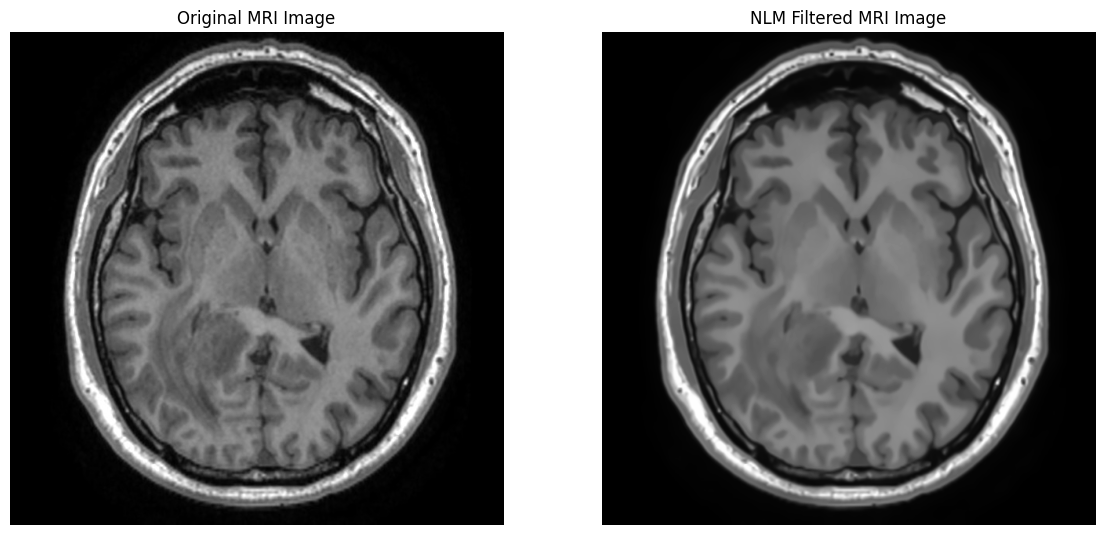

In [8]:
plt.figure(figsize=(14, 7))

# 원본 MRI 이미지
plt.subplot(1, 2, 1)
plt.imshow(mri_image, cmap='gray')
plt.title("Original MRI Image")
plt.axis('off')

# NLM 필터링 적용 MRI 이미지
plt.subplot(1, 2, 2)
plt.imshow(nlm_filtered, cmap='gray')
plt.title("NLM Filtered MRI Image")
plt.axis('off')

plt.show()